In [1]:
import pandas as pd
import random
import numpy as np
from random import randint
df = pd.read_csv (r'C:\Users\User\10__titik__kompleks.csv')

In [18]:
def ends(df, x=5):
    return df.head(x).append(df.tail(x))
ends(df)

,sumber,tujuan,bobot
0,1,2,115
1,1,3,74
2,1,4,42
3,1,5,955
4,1,6,712
40,7,9,814
41,7,10,82
42,8,9,740
43,8,10,703
44,9,10,886


In [ ]:
df.tail()

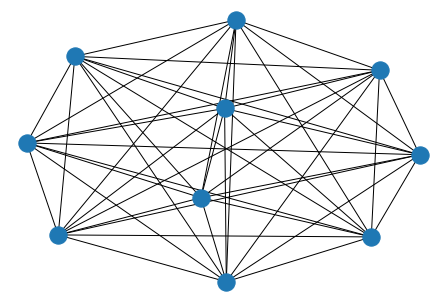

In [3]:
import networkx as nx 
G = nx.from_pandas_edgelist(df,'sumber','tujuan',edge_attr=True)
nx.draw(G)

In [4]:
def titik(df): #mendeklarasikan semua vortex dalam graf
    global vortex,awal
    vortex = []
    
    for i in range(len(df)):
        if df.iloc[i]['tujuan'] not in vortex:
            vortex.append(df.iloc[i]['tujuan'])
        if df.iloc[i]['sumber'] not in vortex:
            vortex.append(df.iloc[i]['sumber'])
    vortex
    #membuar akar random dari Graph
    
    root= vortex[randint(0,len(vortex)-1)]
    awal=pd.DataFrame( columns = ['sumber', 'tujuan', 'bobot'])
    for i in range(len(df)):
        if df.iloc[i]['tujuan'] == root:
            awal = awal.append(df.iloc[i])
        if df.iloc[i]['sumber'] == root:
            awal = awal.append(df.iloc[i])
    awal=awal.sort_values(by=['bobot'])
    awal = awal.iloc[[0]]

In [5]:
def titik_():
    global vortex1
    vortex1 = []
    for i in range(len(awal)): #mengambil titik yang sudah di pilih di vortex
        if awal.iloc[i]['tujuan'] not in vortex1:
            vortex1.append(awal.iloc[i]['tujuan'])
        if awal.iloc[i]['sumber'] not in vortex1:
            vortex1.append(awal.iloc[i]['sumber'])

In [6]:
def eleminasi():
    global vortex1
    vortex1 = []
    for i in range(len(awal)): #mengambil titik yang sudah di pilih di vortex
        if awal.iloc[i]['tujuan'] not in vortex1:
            vortex1.append(awal.iloc[i]['tujuan'])
        if awal.iloc[i]['sumber'] not in vortex1:
            vortex1.append(awal.iloc[i]['sumber'])
    
    global sementara,tes #dan simpan dalam tes
    sementara = pd.DataFrame( columns = ['sumber', 'tujuan', 'bobot'])
    for i in range(len(df)):
        if df.iloc[i]['sumber'] in vortex1:
            if df.iloc[i]['tujuan'] not in vortex1:
                sementara=sementara.append(df.iloc[[i]])
        if df.iloc[i]['tujuan'] in vortex1:
            if df.iloc[i]['sumber'] not in vortex1:
                sementara=sementara.append(df.iloc[[i]])
    
    
    
    tes = pd.DataFrame( columns = ['sumber', 'tujuan', 'bobot'])
    for i in range(len(sementara)):
        if sementara.iloc[i]['tujuan'] not in vortex1:
            if sementara.iloc[i]['sumber'] in vortex1:
                tes = tes.append(sementara.iloc[[i]])
        if sementara.iloc[i]['sumber'] not in vortex1:
            if sementara.iloc[i]['tujuan'] in vortex1:
                tes = tes.append(sementara.iloc[[i]])

In [7]:
def meminimumkan(): #mengurutkan calon jalur yang dipilih lalu 3 terkecil di minimum agar diberikan peluang
    global minimum,tes
    tes=tes.sort_values(by=['bobot']) 
    # disini gunakan 2 sisi minimum
    minimum = tes.iloc[0:3]

In [8]:
def peluang():
    global prob,a,minimum
    prob = []

    for i in range(len(minimum)):
        a = random.uniform(0,1)
        prob.append(a)

    minimum['Prob'] = prob 
    minimum=minimum.sort_values(by=['Prob']) #calon edge yang akan dipilih dimasukkan pada variable minimum yang sudah
                                                # dan dengan peluang yang sudah diurutkan
    

In [9]:
def menambahkan():
    global awal
    a=minimum.iloc[[len(minimum)-1]]
    a = a[['sumber','tujuan','bobot']]
    awal=awal.append(a)


In [10]:
def mengganti_minimum():
    outer_join=tes.merge(sisih, how = 'outer', indicator = True)
    tes = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)

In [11]:
def mst_peluang():
    global awal
    titik(df)
    while (len(awal))<(len(vortex)-1):
        try:
            eleminasi()
            meminimumkan()
            peluang()
            menambahkan()
        except IndexError:
            break
    bobot_total = 0
    for i in range(len(awal)):
        bobot = int(awal.iloc[i]['bobot'])
        bobot_total += bobot
    print("bobot totalnya ialah ",bobot_total)

In [13]:
mst_peluang()

<ipython-input-8-b008045db219>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimum['Prob'] = prob


bobot totalnya ialah  1045


In [14]:
awal

,sumber,tujuan,bobot
2,1,4,42
26,4,7,132
31,5,7,70
1,1,3,74
0,1,2,115
34,5,10,24
39,7,8,144
19,3,6,372
37,6,9,72


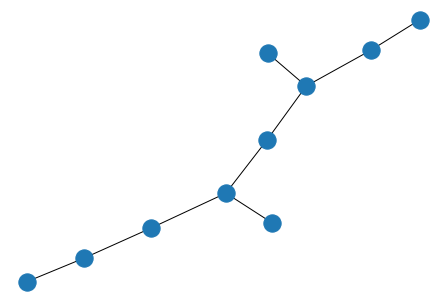

In [16]:
hasil= nx.from_pandas_edgelist(awal,'sumber','tujuan',edge_attr=True)
nx.draw(hasil)